<a href="https://colab.research.google.com/github/AbhilashIngale/EVA-Projects/blob/master/Session3/Session3_BN_DO_DF_best_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 3 : Training MNIST Dataset with a custom Neural Network

## About MNIST

The introduction to the dataset at http://yann.lecun.com says it all -

''The MNIST ( (Modified National Institute of Standards and Technology) database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.''



##Import Libraries and modules##

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
# Import all the dependancies and packages required
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

# Import the MNIST dataset from keras
from keras.datasets import mnist

## Load pre-shuffled MNIST data into train and test sets

In [0]:
# Doing the train-test split on the MNIST dataset. Default split ratio (test to train ) is : 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


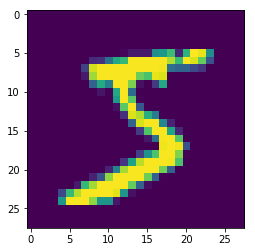

In [0]:
# Visualizing one of the images from the training set
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Converting the intensity range from 0-255 to 0-1 . This is done basically to avoid high computations and preserve system memory.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
# Print the true labels in the training set.
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
# Print the class matrix of the training set. Here, the true label is the one where '1' occurs for each training point.
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

##Network Architecture##

In [0]:
# Importing Activation function and Batch Norm 
from keras.layers import Activation
from keras.layers import BatchNormalization as BN 

############################ START #############################################

model = Sequential()
 
model.add(Convolution2D(16, 3, 3,activation='relu', input_shape=(28,28,1)))     
model.add(BN())

model.add(Convolution2D(24, 3, 3,activation='relu'))                            
model.add(BN())


model.add(Convolution2D(12, 1, 1, activation='relu'))                           
model.add(BN())
model.add(MaxPooling2D(pool_size=(2, 2)))                                      
model.add(Dropout(0.40))

model.add(Convolution2D(12, 3, 3, activation='relu'))                           
model.add(BN())

model.add(Convolution2D(24, 3, 3, activation='relu'))                           
model.add(BN())

model.add(Convolution2D(32, 3, 3, activation='relu'))                          
model.add(BN())

model.add(Convolution2D(24, 1, 1, activation='relu'))                                   
model.add(BN())
model.add(MaxPooling2D(pool_size=(2, 2)))                                      

model.add(BN())
model.add(Dropout(0.40))                                                        
model.add(Convolution2D(10, 3, 3, activation= None ))                            

model.add(Flatten())
model.add(Activation('softmax'))

############################## END #############################################

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (1, 1), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call t

##Why the above architecture ???##
Here, the objective is to maximize the validation accuracy with only simple tools like : Batch Normalization , dropouts (which we not use in future networks) and 3x3 and 1x1 kernels.

Let us look at them one by one : - 

### Batch Normalization ### 
The idea is to normalise the inputs of each layer in such a way that they have a mean output activation of zero and standard deviation of one. This is analogous to how the inputs to networks are standardised.

How does this help? We know that normalising the inputs to a network helps it learn. But a network is just a series of layers, where the output of one layer becomes the input to the next. That means we can think of any layer in a neural network as the first layer of a smaller subsequent network.

Thought of as a series of neural networks feeding into each other, we normalising the output of one layer before applying the activation function, and then feed it into the following layer (sub-network).

(**source** : https://medium.com/deeper-learning)

### Dropout ### 
![alt text](https://static.commonlounge.com/fp/600w/aOLPWvdc8ukd8GTFUhff2RtcA1520492906_kc)

In Layman's term , Droput implies this - 

" If you are running a startup which requires a Mech engineer , an Electronics Engineer and CS Engineer and if someday the Electronics Engineer does not show up, then the other two guys have to work extra to compensate for his loss or **LEARN** some new skills apart from their own. This ensures that the startup keeps running"  OR  in other words - 

Dropouts ensure that the model does not overfit to the training data and is able to combine and extract complex features from the model. Also, since the neurons/kernels that would be droppped are always random, we can be sure of not loosing on the accuracy.

**Dropout always increases the validaton accuracy but the training accuracy might go down.**


### Summary ###

Thus , Dropouts and Batch Norm are the two factors that could contribute positively to the model architecture. The question of the optimal dropout percentage is a matter of practical experimentation and trail rather than theory. It varies greatly according to the dataset. 

In [0]:
# Shows the image shape after each convolution and the parameter count. Also, shows the trainable and non-trainable parameters. 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_61 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 24, 24, 24)        3480      
_________________________________________________________________
batch_normalization_62 (Batc (None, 24, 24, 24)        96        
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 24, 24, 12)        300       
_________________________________________________________________
batch_normalization_63 (Batc (None, 24, 24, 12)        48        
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 12)        0         
__________

In [0]:
# Compile the model: Specify loss function , optimizer e.g. SGD , adam etc.(in optimizer set learning rate which is a hyper-parameter)
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
# FIT 1 : The first fit ensures that local minimas are avoided and the model moves towardsglobal minima.
model.fit(X_train, Y_train, batch_size=20, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.2545 - acc: 0.9198
Epoch 2/10
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0869 - acc: 0.9731
Epoch 3/10
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0720 - acc: 0.9780
Epoch 4/10
60000/60000 [==============================] - 60s 993us/step - loss: 0.0592 - acc: 0.9819
Epoch 5/10
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0548 - acc: 0.9834
Epoch 6/10
60000/60000 [==============================] - 59s 991us/step - loss: 0.0501 - acc: 0.9841
Epoch 7/10
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0459 - acc: 0.9860
Epoch 8/10
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0448 - acc: 0.9856
Epoch 9/10
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0417 - acc: 0.9869
Epoch 10/10
60000/60000 [==============================] - 60s 994us/step - loss: 0.0410 - acc: 

In [0]:
# FIT 2 : Once the model is trained on smaller batch size and has avoided local minima , we train it on higher batch size 
#         to increase the accuracy on traning and validation sets.
model.fit(X_train, Y_train, batch_size=200, nb_epoch=10, verbose=1)

Epoch 1/10
 1000/60000 [..............................] - ETA: 10s - loss: 0.0326 - acc: 0.9890

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 8s 137us/step - loss: 0.0265 - acc: 0.9918
Epoch 2/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.0253 - acc: 0.9921
Epoch 3/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.0230 - acc: 0.9929
Epoch 4/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.0225 - acc: 0.9931
Epoch 5/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.0221 - acc: 0.9931
Epoch 6/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.0215 - acc: 0.9931
Epoch 7/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.0208 - acc: 0.9933
Epoch 8/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.0204 - acc: 0.9934
Epoch 9/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.0210 - acc: 0.9936
Epoch 10/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.0202 - acc: 0.9936


In [0]:
# Evaluates the metrics i.e. Loss and Accuracy on the test set
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
# Printing the metrics evaluated above
print(score)

[0.01631879683381121, 0.9952]


In [0]:
# Making predictions on the test set and storing the result y_pred
y_pred = model.predict(X_test)

In [0]:
# print the predicted class matrix and true test labels.
print(y_pred[:9])
print(y_test[:9])

[[1.3178778e-09 7.4397319e-09 1.2129084e-08 3.0000255e-08 7.5079427e-09
  5.0223098e-10 1.2860558e-13 9.9999964e-01 1.7623912e-10 3.3180677e-07]
 [1.0946612e-06 4.3224620e-07 9.9999774e-01 1.5223316e-09 9.1932001e-10
  1.3086586e-11 6.5913571e-07 1.7668350e-09 3.8550096e-09 6.8134837e-10]
 [2.5179867e-07 9.9998510e-01 2.9907193e-07 8.0760669e-09 3.5880848e-06
  8.0793404e-07 3.3477913e-06 5.9870486e-06 1.7243251e-07 3.7069836e-07]
 [9.9996948e-01 2.3973615e-11 4.9944583e-07 9.3599848e-09 2.4469196e-09
  1.7626367e-07 2.8916493e-05 9.9839081e-10 1.9338499e-07 7.8645911e-07]
 [3.4482271e-11 1.3303659e-08 9.1029587e-11 1.6079695e-11 9.9999845e-01
  5.2060195e-10 8.7821134e-10 7.1360944e-09 3.7412651e-08 1.4819424e-06]
 [2.5167901e-07 9.9996567e-01 3.8647150e-07 1.0266250e-09 9.0217909e-06
  4.5527155e-08 1.4420281e-06 2.2072541e-05 5.1123163e-08 1.1535059e-06]
 [1.3385083e-12 1.0797426e-06 3.3771670e-09 3.6332413e-12 9.9999690e-01
  4.1594625e-10 1.7217909e-10 2.8564745e-07 3.9604227e-08 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
################# CODE TO VISUALIZE FEATURE MAPS ###############################
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_65'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()